3125.0 797.0 116.0


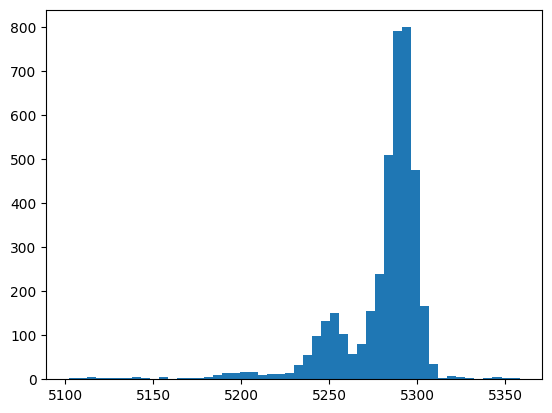

In [337]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL
from scipy.stats import norm
from scipy.integrate import quad

#file = input("File: ")
raw_data = np.loadtxt("50mm2_241Am/Vbias_50mm2_241Am_06-11-24_V28.dat")

data1 = []

for i in range(len(raw_data)):
    for j in range(int(raw_data[i])):
        data1.append(i)

data = np.array(data1)

signal = []


for i in range(len(data)):
    if data[i] > 5100 and data[i] < 8000: signal.append(data[i])

N=sum(raw_data)

def model(x, N1, N2, N3, mu1, sigma1, mu2, sigma2, mu3, sigma3):
	return N1*norm.cdf(x, loc = mu1, scale = sigma1) + N2*norm.cdf(x, loc = mu2, scale = sigma2) + N3*norm.cdf(x, loc = mu3, scale = sigma3)

nbins = int(np.ceil(1 + np.log(len(signal)/np.log(2)))) * 5

bin_content, bin_edges, _ = plt.hist(signal, bins = nbins)


N1_ext = 0
N2_ext = 0
N3_ext = 0

for i in range(5275, 5350): #picco1 (più a dx)
    N1_ext = N1_ext + raw_data[i]

for i in range(5225, 5275): #picco2
    N2_ext = N2_ext + raw_data[i]

for i in range(5175, 5225): #picco3 (più a sx)
    N3_ext = N3_ext + raw_data[i]

print(N1_ext, N2_ext, N3_ext)

In [338]:
N_events = sum(bin_content)

costf = ExtendedBinnedNLL(bin_content, bin_edges, model)

my_minuit = Minuit(costf, N1 = N1_ext, N2 = N2_ext, N3=N3_ext,  mu1 = 5300, sigma1 = 5, mu2= 5250, sigma2= 5, mu3=5200, sigma3=5)
'''my_minuit.limits["mu1"] = [5000,5500]
my_minuit.limits["mu2"] = [4750,5000]
my_minuit.limits["mu3"] = [4250,4750]'''
my_minuit.migrad()

ch1 = my_minuit.values['mu1']
err_ch1 = my_minuit.errors['mu1']
fwhm1 = 2.355 * my_minuit.values['sigma1']
err_fwhm1 = 2.355 * my_minuit.errors['sigma1']
frac1 = fwhm1 / ch1
err_frac1 = frac1 * (err_ch1/ch1 + err_fwhm1/fwhm1)

ch2 = my_minuit.values['mu2']
err_ch2 = my_minuit.errors['mu2']
fwhm2 = 2.355 * my_minuit.values['sigma2']
err_fwhm2 = 2.355 * my_minuit.errors['sigma2']
frac2 = fwhm2 / ch2
err_frac2 = frac2 * (err_ch2/ch2 + err_fwhm2/fwhm2)

ch3 = my_minuit.values['mu3']
err_ch3 = my_minuit.errors['mu3']
fwhm3 = 2.355 * my_minuit.values['sigma3']
err_fwhm3 = 2.355 * my_minuit.errors['sigma3']
frac3 = fwhm3 / ch3
err_frac3 = frac3 * (err_ch3/ch3 + err_fwhm3/fwhm3)


print("chi2: " + str(my_minuit.fval/my_minuit.ndof))


print("\n \n channel1: " + str(ch1)  + " +/- " + str(err_ch1))
print("\n fwhm1: " + str(fwhm1) + " +/- " + str(err_fwhm1))
print("\n fwhm1/channel1 (1e-3): " + str(frac1 * 10**3) + " +/- " + str(err_frac1 * 10**3))

'''print("\n \n channel2: " + str(ch2)  + " +/- " + str(err_ch2))
print("\n fwhm2: " + str(fwhm2) + " +/- " + str(err_fwhm2))
print("\n fwhm2/channel2 (1e-3): " + str(frac2 * 10**3) + " +/- " + str(err_frac2 * 10**3))

print("\n \n channel3: " + str(ch3)  + " +/- " + str(err_ch3))
print("\n fwhm3: " + str(fwhm3) + " +/- " + str(err_fwhm3))
print("\n fwhm3/channel3 (1e-3): " + str(frac3 * 10**3) + " +/- " + str(err_frac3 * 10**3))'''

display(my_minuit)

print()

chi2: 2.801860059024604

 
 channel1: 5290.54766482405 +/- 0.1774445578782272

 fwhm1: 17.82498094854181 +/- 0.3543488904222206

 fwhm1/channel1 (1e-3): 3.369212807032639 +/- 0.06709073642019003


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 114.9 (χ²/ndof = 2.8)      │             Nfcn = 1049              │
│ EDM = 1.76e-05 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  3.08e3   │  0.06e3   │            │            │         │         │       │
│ 1 │ N2     │    650    │    40     │            │            │         │         │       │
│ 2 │ N3     │    359    │    31     │            │            │         │         │       │
│ 3 │ mu1    │ 5.29055e3 │ 0.00018e3 │            │            │         │         │       │
│ 4 │ sigma1 │   7.57    │   0.15    │            │            │         │         │       │
│ 5 │ mu2    │ 5.2527e3  │ 0.0008e3  │            │            │         │         │       │
│ 6 │ sigma2 │   11.0    │    0.8    │            │            │         │         │       │
│ 7 │ mu3    │  5.235e3  │  0.005e3  │            │            │         │         │       │
│ 8 │ sigma3 │    62     │     4     │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬──────────────────────────────────────────────────────────────────────────────────┐
│        │       N1       N2       N3      mu1   sigma1      mu2   sigma2      mu3   sigma3 │
├────────┼──────────────────────────────────────────────────────────────────────────────────┤
│     N1 │ 3.62e+03   -0.4e3   -0.1e3   -2.136    2.354    -12.7    -12.3      -27       -4 │
│     N2 │   -0.4e3 1.59e+03   -0.5e3    2.608   -2.373     14.1     19.4      -36       56 │
│     N3 │   -0.1e3   -0.5e3      964   -0.439   -0.045     -1.3     -6.4       65      -31 │
│    mu1 │   -2.136    2.608   -0.439   0.0315   -0.011    0.065    0.066   -0.026    0.046 │
│ sigma1 │    2.354   -2.373   -0.045   -0.011   0.0226   -0.063   -0.061   -0.052   -0.050 │
│    mu2 │    -12.7     14.1     -1.3    0.065   -0.063    0.636      0.4     -0.1      0.1 │
│ sigma2 │    -12.3     19.4     -6.4    0.066   -0.061      0.4    0.606     -0.4      0.8 │
│    mu3 │      -27      -36       65   -0.026   -0.052     -0.1     -0.4     22.6       -2 │
│ sigma3 │       -4       56      -31    0.046   -0.050      0.1      0.8       -2     18.8 │
└────────┴──────────────────────────────────────────────────────────────────────────────────┘

ValueError: operands could not be broadcast together with shapes (1000,) (2,) 

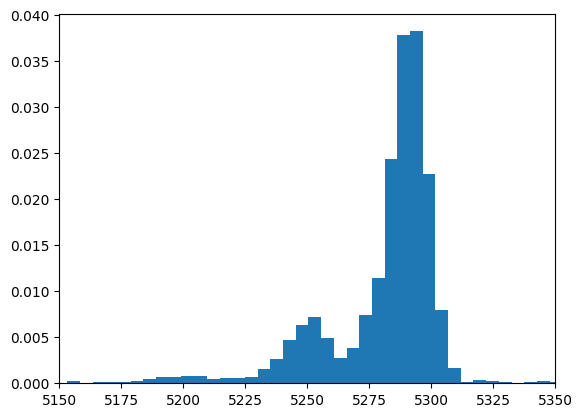

In [339]:
fig,ax = plt.subplots(1,1)
plt.xlim(5150, 5350)
ax.hist(signal, bins = nbins, density=True)

x = np.linspace(5100, 5350, 1000)
def func(x):
    return my_minuit.values["N1"] * norm.pdf(x, my_minuit.values["mu1"], my_minuit.values["sigma1"]) + \
        my_minuit.values["N2"] * norm.pdf(x, my_minuit.values["mu2"], my_minuit.values["sigma2"]) + \
        my_minuit.values["N3"] * norm.pdf(x, my_minuit.values["mu3"], my_minuit.values["sigma3"])
area = quad(func, -np.inf, np.inf)
y = func(x) / area

plt.plot(x,y)
plt.show()